In [1]:
import pandas as pd
import numpy as np
import keras as ks 

np.random.seed(5)

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedamt']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [6]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential([
    Dense(units=18, input_dim = 29,activation='relu'),
    Dense(units=26,activation='relu'),
    Dropout(0.5),
    Dense(22,activation='relu'),
    Dense(22,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                494       
_________________________________________________________________
dropout (Dropout)            (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                594       
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 23        
Total params: 2,157
Trainable params: 2,157
Non-trainable params: 0
______________________________________________________

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
21361/21361 [==============================] - 32s 1ms/step - loss: 0.0196 - accuracy: 0.9984
Epoch 2/10
21361/21361 [==============================] - 32s 1ms/step - loss: 0.0046 - accuracy: 0.9993
Epoch 3/10
21361/21361 [==============================] - 32s 1ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 4/10
21361/21361 [==============================] - 31s 1ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 5/10
21361/21361 [==============================] - 32s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 6/10
21361/21361 [==============================] - 31s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 7/10
21361/21361 [==============================] - 31s 1ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 8/10
21361/21361 [==============================] - 32s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/10
21361/21361 [==============================] - 31s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
21361/21361 [==============================

In [10]:
score = model.evaluate(X_test, y_test)

2226/2226 [==============================] - 2s 898us/step - loss: 0.0068 - accuracy: 0.9995


In [11]:
print(score)


[0.0068204342387616634, 0.9994803667068481]


In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [13]:
print(cnf_matrix)


[[71071    10]
 [   27    94]]


In [14]:

y_pred = model.predict(X)
cnf_matrix = confusion_matrix(y, y_pred.round())
print(cnf_matrix)

[[284276     39]
 [   121    371]]


In [15]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.25)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/10
42648/42648 [==============================] - 63s 1ms/step - loss: 0.0513 - accuracy: 0.9811
Epoch 2/10
42648/42648 [==============================] - 60s 1ms/step - loss: 0.0135 - accuracy: 0.9964
Epoch 3/10
42648/42648 [==============================] - 60s 1ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 4/10
42648/42648 [==============================] - 64s 2ms/step - loss: 0.0109 - accuracy: 0.9973
Epoch 5/10
42648/42648 [==============================] - 61s 1ms/step - loss: 0.0095 - accuracy: 0.9978
Epoch 6/10
42648/42648 [==============================] - 61s 1ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 7/10
42648/42648 [==============================] - 61s 1ms/step - loss: 0.0084 - accuracy: 0.9981
Epoch 8/10
42648/42648 [==============================] - 62s 1ms/step - loss: 0.0081 - accuracy: 0.9982
Epoch 9/10
42648/42648 [==============================] - 62s 1ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 10/10
42648/42648 [==============================

In [17]:
score = model.evaluate(X_test, y_test)
print(score)

4443/4443 [==============================] - 4s 941us/step - loss: 0.0062 - accuracy: 0.9986
[0.006182815879583359, 0.9986141920089722]


In [18]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

In [19]:
print(cnf_matrix)

[[70657   173]
 [   24 71304]]


In [20]:
y_pred = model.predict(X)
cnf_matrix = confusion_matrix(y, y_pred.round())
print(cnf_matrix)

[[283650    665]
 [     3    489]]


In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Load the Credit Card dataset
data = pd.read_csv("creditcard.csv")

# Success
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
data.shape


(284807, 31)

Text(0, 0.5, 'Frequency')

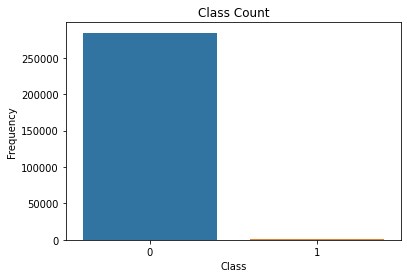

In [24]:
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [26]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

Text(0, 0.5, 'Frequency')

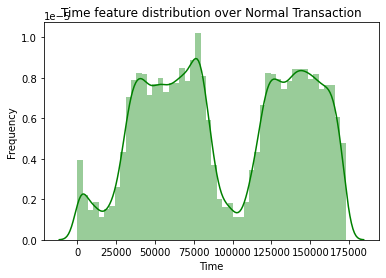

In [27]:
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

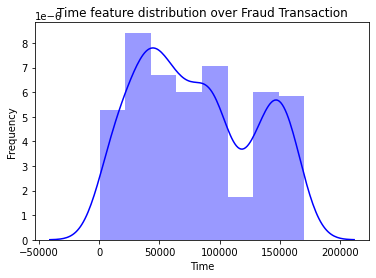

In [28]:
sns.distplot(fraud.Time, color='b')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

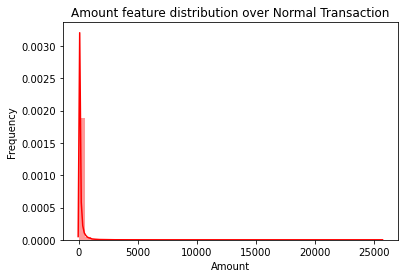

In [30]:
sns.distplot(normal.Amount, color='r')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

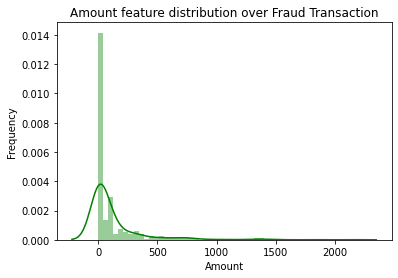

In [31]:
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

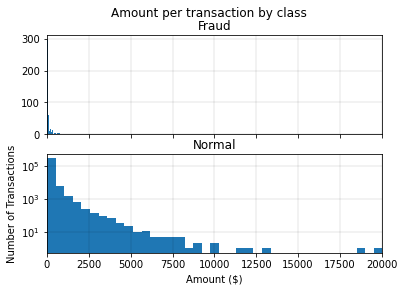

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

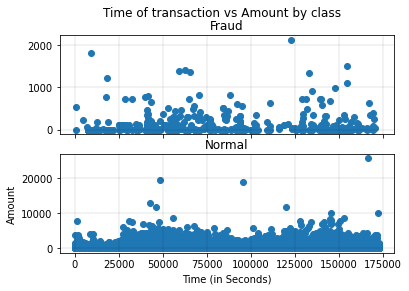

In [33]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
model_data = data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [35]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

In [36]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

oversampler = SMOTE(random_state = 0, n_jobs = -1)
#sampler = SMOTETomek(random_state = 0)
model_train_lr , model_test_lr = oversampler.fit_sample(model_train, model_test)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [39]:
lr_predict = lr.predict(X_test)

Accuracy: 94.4808%
Recall: 91.5108%
ROC AUC: 94.4901%


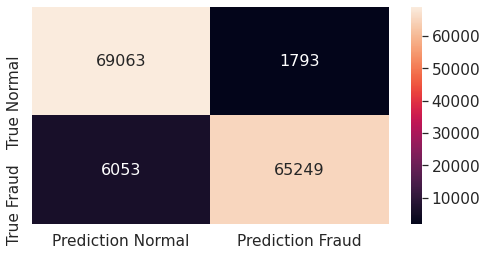

In [40]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [42]:
#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

#oversampler = SMOTE(random_state = 0)
sampler = SMOTETomek(random_state = 0)
model_train_rf , model_test_rf = sampler.fit_sample(model_train, model_test)

In [43]:

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [44]:
for train_index, test_index in sss.split(model_train_rf, model_test_rf):
    X_train, X_test = model_train_rf[train_index], model_train_rf[test_index]
    Y_train, Y_test = model_test_rf[train_index], model_test_rf[test_index]

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
rf_predict = rf.predict(X_test)

Accuracy: 99.9859%
Recall: 100.0000%
ROC AUC: 99.9859%


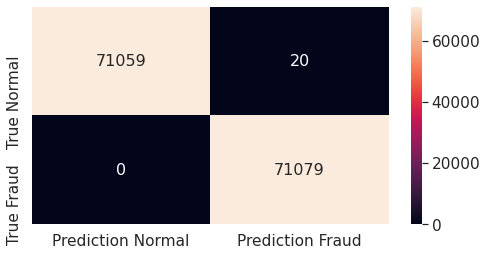

In [47]:

rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [48]:
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

undersampler = TomekLinks(random_state = 0, n_jobs = -1)
#oversampler = SMOTE(random_state = 0)
#sampler = SMOTETomek(random_state = 0)
model_train_km , model_test_km = sampler.fit_sample(model_train, model_test)

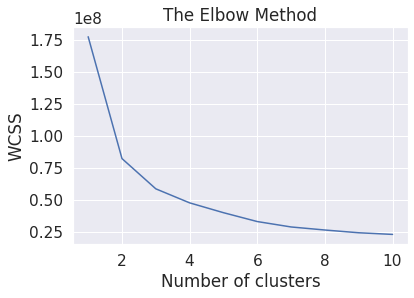

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans.fit(model_train_km)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_train_km)

In [51]:
centers = kmeans.cluster_centers_

In [52]:

from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(model_train_km, centers, 'euclidean'))
distance['distance_mean'] = distance.apply(np.mean, axis=1)
distance.head()

,0,1,distance_mean
0,5.666570,38.973187,22.319879
1,4.794702,38.884258,21.839480
2,7.495325,39.358736,23.427031
3,6.193039,39.171095,22.682067
4,5.546435,38.912090,22.229263


In [53]:
out_per = np.percentile(distance['distance_mean'], 95)

In [54]:
model_predict_km = np.where(distance['distance_mean'] >= out_per, 1, 0)

Accuracy: 54.3814%
Recall: 9.3815%
ROC AUC: 54.3814%


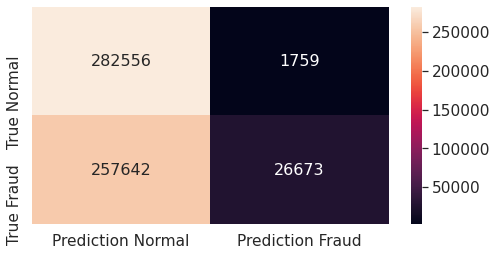

In [55]:

km_accuracy = accuracy_score(model_test_km, model_predict_km)
km_recall = recall_score(model_test_km, model_predict_km)
km_cm = confusion_matrix(model_test_km, model_predict_km)
km_auc = roc_auc_score(model_test_km, model_predict_km)

print("Accuracy: {:.4%}".format(km_accuracy))
print("Recall: {:.4%}".format(km_recall))
print("ROC AUC: {:.4%}".format(km_auc))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [56]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'K-Means': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'K-Means': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'K-Means': km_auc
}

Text(0.5, 0, 'Accuracy Score')

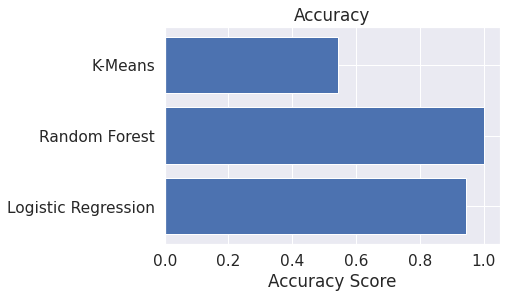

In [57]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

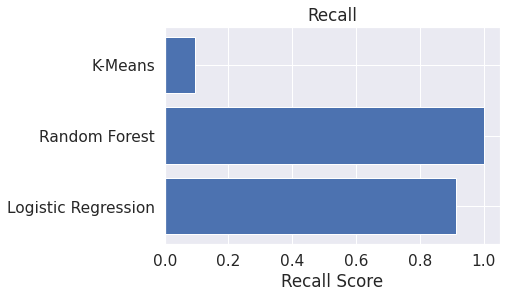

In [58]:

pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

Text(0.5, 0, 'AUC Score')

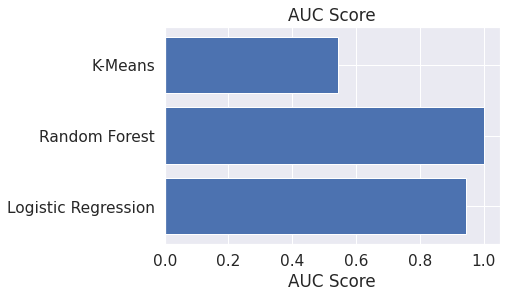

In [59]:

pyplot.title('AUC Score')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score')